In [1]:
import numpy
import torchvision
import torchvision.transforms.v2

transform = torchvision.transforms.v2.Compose([
    torchvision.transforms.v2.Grayscale(),
    torchvision.transforms.v2.Resize((32, 32))
])

train = torchvision.datasets.ImageFolder(
    '../experiments/labeled_faces_in_the_wild/lfw/training',
    transform = transform
)
train_images = numpy.array([ train[i][0] for i in range(40) ]) / 255
train_labels = numpy.array([ train[i][1] for i in range(40) ])

test = torchvision.datasets.ImageFolder(
    '../experiments/labeled_faces_in_the_wild/lfw/testing',
    transform = transform
)
test_images = numpy.array([ test[i][0] for i in range(4, 14) ]) / 255
test_labels = numpy.array([ test[i][1] for i in range(4, 14) ])

In [2]:
import cvtda.topology
extractor = cvtda.topology.FeatureExtractor(
    n_jobs = 1,
    binarizer_thresholds = [ 0.4 ],
    num_radial_filtrations = 2
)
train_features = extractor.fit_transform(train_images, "train")
test_features = extractor.transform(test_images, "test")

Calculating inverted images
GreyscaleExtractor: processing train/greyscale, do_fit = True
Saving the result to ./train/greyscale/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00, 89.22it/s]

Saving the result to ./train/greyscale/features.npy
GreyscaleExtractor: processing train/greyscale, do_fit = False
Got the result from ./train/greyscale/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./train/greyscale/features.npy
GreyscaleExtractor: processing train/inverted_greyscale, do_fit = True
Saving the result to ./train/inverted_greyscale/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00, 66.66it/s]


Saving the result to ./train/inverted_greyscale/features.npy
GreyscaleExtractor: processing train/inverted_greyscale, do_fit = False
Got the result from ./train/inverted_greyscale/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./train/inverted_greyscale/features.npy
Fitting filtrations
Fitting filtration 1/12: 4/HeightFiltrartion_-1_-1
FiltrationExtractor: processing train/filtrations/4/HeightFiltrartion_-1_-1, do_fit = True, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=1)
Saving the result to ./train/filtrations/4/HeightFiltrartion_-1_-1/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00, 166.69it/s]

Saving the result to ./train/filtrations/4/HeightFiltrartion_-1_-1/features.npy
Fitting filtration 2/12: 4/HeightFiltrartion_-1_0
FiltrationExtractor: processing train/filtrations/4/HeightFiltrartion_-1_0, do_fit = True, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=1)


Saving the result to ./train/filtrations/4/HeightFiltrartion_-1_0/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00, 142.88it/s]

Saving the result to ./train/filtrations/4/HeightFiltrartion_-1_0/features.npy
Fitting filtration 3/12: 4/HeightFiltrartion_-1_1
FiltrationExtractor: processing train/filtrations/4/HeightFiltrartion_-1_1, do_fit = True, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=1)
Saving the result to ./train/filtrations/4/HeightFiltrartion_-1_1/diagrams.npy


Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00, 166.68it/s]

Saving the result to ./train/filtrations/4/HeightFiltrartion_-1_1/features.npy
Fitting filtration 4/12: 4/HeightFiltrartion_0_-1
FiltrationExtractor: processing train/filtrations/4/HeightFiltrartion_0_-1, do_fit = True, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)


Saving the result to ./train/filtrations/4/HeightFiltrartion_0_-1/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00, 142.83it/s]

Saving the result to ./train/filtrations/4/HeightFiltrartion_0_-1/features.npy
Fitting filtration 5/12: 4/HeightFiltrartion_0_1
FiltrationExtractor: processing train/filtrations/4/HeightFiltrartion_0_1, do_fit = True, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=1)
Saving the result to ./train/filtrations/4/HeightFiltrartion_0_1/diagrams.npy


Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00, 124.89it/s]

Saving the result to ./train/filtrations/4/HeightFiltrartion_0_1/features.npy
Fitting filtration 6/12: 4/HeightFiltrartion_1_-1
FiltrationExtractor: processing train/filtrations/4/HeightFiltrartion_1_-1, do_fit = True, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=1)
Saving the result to ./train/filtrations/4/HeightFiltrartion_1_-1/diagrams.npy


Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00, 117.41it/s]

Saving the result to ./train/filtrations/4/HeightFiltrartion_1_-1/features.npy
Fitting filtration 7/12: 4/HeightFiltrartion_1_0
FiltrationExtractor: processing train/filtrations/4/HeightFiltrartion_1_0, do_fit = True, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=1)
Saving the result to ./train/filtrations/4/HeightFiltrartion_1_0/diagrams.npy


Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00, 181.56it/s]

Saving the result to ./train/filtrations/4/HeightFiltrartion_1_0/features.npy
Fitting filtration 8/12: 4/HeightFiltrartion_1_1
FiltrationExtractor: processing train/filtrations/4/HeightFiltrartion_1_1, do_fit = True, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=1)
Saving the result to ./train/filtrations/4/HeightFiltrartion_1_1/diagrams.npy


Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00, 124.96it/s]


Saving the result to ./train/filtrations/4/HeightFiltrartion_1_1/features.npy
Fitting filtration 9/12: 4/RadialFiltration_10_10
FiltrationExtractor: processing train/filtrations/4/RadialFiltration_10_10, do_fit = True, filtration = RadialFiltration(center=array([10, 10]), n_jobs=1)
Saving the result to ./train/filtrations/4/RadialFiltration_10_10/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00, 166.73it/s]


Saving the result to ./train/filtrations/4/RadialFiltration_10_10/features.npy
Fitting filtration 10/12: 4/RadialFiltration_10_21
FiltrationExtractor: processing train/filtrations/4/RadialFiltration_10_21, do_fit = True, filtration = RadialFiltration(center=array([10, 21]), n_jobs=1)
Saving the result to ./train/filtrations/4/RadialFiltration_10_21/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00, 142.86it/s]


Saving the result to ./train/filtrations/4/RadialFiltration_10_21/features.npy
Fitting filtration 11/12: 4/RadialFiltration_21_10
FiltrationExtractor: processing train/filtrations/4/RadialFiltration_21_10, do_fit = True, filtration = RadialFiltration(center=array([21, 10]), n_jobs=1)
Saving the result to ./train/filtrations/4/RadialFiltration_21_10/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00, 142.90it/s]


Saving the result to ./train/filtrations/4/RadialFiltration_21_10/features.npy
Fitting filtration 12/12: 4/RadialFiltration_21_21
FiltrationExtractor: processing train/filtrations/4/RadialFiltration_21_21, do_fit = True, filtration = RadialFiltration(center=array([21, 21]), n_jobs=1)
Saving the result to ./train/filtrations/4/RadialFiltration_21_21/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00, 111.11it/s]


Saving the result to ./train/filtrations/4/RadialFiltration_21_21/features.npy
Applying filtrations
Applying filtration 1/12: 4/HeightFiltrartion_-1_-1
FiltrationExtractor: processing train/filtrations/4/HeightFiltrartion_-1_-1, do_fit = False, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=1)
Got the result from ./train/filtrations/4/HeightFiltrartion_-1_-1/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./train/filtrations/4/HeightFiltrartion_-1_-1/features.npy
Applying filtration 2/12: 4/HeightFiltrartion_-1_0
FiltrationExtractor: processing train/filtrations/4/HeightFiltrartion_-1_0, do_fit = False, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=1)
Got the result from ./train/filtrations/4/HeightFiltrartion_-1_0/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./train/filtrations/4/HeightFiltrartion_-1_0/features.npy
Applying filtration 3/12: 4/HeightFiltrartion_-1_1
FiltrationExtractor: processing

GrayGeometryExtractor: 100%|██████████| 40/40 [00:02<00:00, 16.90it/s]


Saving the result to ./train/geometry/features.npy
Got the result from ./train/geometry/features.npy
Applying StandardScaler.
Calculating inverted images
GreyscaleExtractor: processing train/greyscale, do_fit = False
Got the result from ./train/greyscale/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./train/greyscale/features.npy
GreyscaleExtractor: processing train/inverted_greyscale, do_fit = False
Got the result from ./train/inverted_greyscale/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./train/inverted_greyscale/features.npy
Applying filtrations
Applying filtration 1/12: 4/HeightFiltrartion_-1_-1
FiltrationExtractor: processing train/filtrations/4/HeightFiltrartion_-1_-1, do_fit = False, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=1)
Got the result from ./train/filtrations/4/HeightFiltrartion_-1_-1/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./train/filtrations/4/HeightFiltra

DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00, 141.82it/s]


Saving the result to ./test/greyscale/features.npy
GreyscaleExtractor: processing test/inverted_greyscale, do_fit = False
Saving the result to ./test/inverted_greyscale/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00, 166.72it/s]


Saving the result to ./test/inverted_greyscale/features.npy
Applying filtrations
Applying filtration 1/12: 4/HeightFiltrartion_-1_-1
FiltrationExtractor: processing test/filtrations/4/HeightFiltrartion_-1_-1, do_fit = False, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=1)
Saving the result to ./test/filtrations/4/HeightFiltrartion_-1_-1/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00, 199.83it/s]


Saving the result to ./test/filtrations/4/HeightFiltrartion_-1_-1/features.npy
Applying filtration 2/12: 4/HeightFiltrartion_-1_0
FiltrationExtractor: processing test/filtrations/4/HeightFiltrartion_-1_0, do_fit = False, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=1)
Saving the result to ./test/filtrations/4/HeightFiltrartion_-1_0/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00, 166.61it/s]


Saving the result to ./test/filtrations/4/HeightFiltrartion_-1_0/features.npy
Applying filtration 3/12: 4/HeightFiltrartion_-1_1
FiltrationExtractor: processing test/filtrations/4/HeightFiltrartion_-1_1, do_fit = False, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=1)
Saving the result to ./test/filtrations/4/HeightFiltrartion_-1_1/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00, 200.14it/s]


Saving the result to ./test/filtrations/4/HeightFiltrartion_-1_1/features.npy
Applying filtration 4/12: 4/HeightFiltrartion_0_-1
FiltrationExtractor: processing test/filtrations/4/HeightFiltrartion_0_-1, do_fit = False, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)
Saving the result to ./test/filtrations/4/HeightFiltrartion_0_-1/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00, 166.58it/s]


Saving the result to ./test/filtrations/4/HeightFiltrartion_0_-1/features.npy
Applying filtration 5/12: 4/HeightFiltrartion_0_1
FiltrationExtractor: processing test/filtrations/4/HeightFiltrartion_0_1, do_fit = False, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=1)
Saving the result to ./test/filtrations/4/HeightFiltrartion_0_1/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00, 200.09it/s]


Saving the result to ./test/filtrations/4/HeightFiltrartion_0_1/features.npy
Applying filtration 6/12: 4/HeightFiltrartion_1_-1
FiltrationExtractor: processing test/filtrations/4/HeightFiltrartion_1_-1, do_fit = False, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=1)
Saving the result to ./test/filtrations/4/HeightFiltrartion_1_-1/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00, 200.13it/s]


Saving the result to ./test/filtrations/4/HeightFiltrartion_1_-1/features.npy
Applying filtration 7/12: 4/HeightFiltrartion_1_0
FiltrationExtractor: processing test/filtrations/4/HeightFiltrartion_1_0, do_fit = False, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=1)
Saving the result to ./test/filtrations/4/HeightFiltrartion_1_0/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00, 200.03it/s]


Saving the result to ./test/filtrations/4/HeightFiltrartion_1_0/features.npy
Applying filtration 8/12: 4/HeightFiltrartion_1_1
FiltrationExtractor: processing test/filtrations/4/HeightFiltrartion_1_1, do_fit = False, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=1)
Saving the result to ./test/filtrations/4/HeightFiltrartion_1_1/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00, 200.00it/s]


Saving the result to ./test/filtrations/4/HeightFiltrartion_1_1/features.npy
Applying filtration 9/12: 4/RadialFiltration_10_10
FiltrationExtractor: processing test/filtrations/4/RadialFiltration_10_10, do_fit = False, filtration = RadialFiltration(center=array([10, 10]), n_jobs=1)
Saving the result to ./test/filtrations/4/RadialFiltration_10_10/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00, 199.94it/s]


Saving the result to ./test/filtrations/4/RadialFiltration_10_10/features.npy
Applying filtration 10/12: 4/RadialFiltration_10_21
FiltrationExtractor: processing test/filtrations/4/RadialFiltration_10_21, do_fit = False, filtration = RadialFiltration(center=array([10, 21]), n_jobs=1)
Saving the result to ./test/filtrations/4/RadialFiltration_10_21/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00, 199.89it/s]


Saving the result to ./test/filtrations/4/RadialFiltration_10_21/features.npy
Applying filtration 11/12: 4/RadialFiltration_21_10
FiltrationExtractor: processing test/filtrations/4/RadialFiltration_21_10, do_fit = False, filtration = RadialFiltration(center=array([21, 10]), n_jobs=1)
Saving the result to ./test/filtrations/4/RadialFiltration_21_10/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00, 200.03it/s]


Saving the result to ./test/filtrations/4/RadialFiltration_21_10/features.npy
Applying filtration 12/12: 4/RadialFiltration_21_21
FiltrationExtractor: processing test/filtrations/4/RadialFiltration_21_21, do_fit = False, filtration = RadialFiltration(center=array([21, 21]), n_jobs=1)
Saving the result to ./test/filtrations/4/RadialFiltration_21_21/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00, 166.70it/s]


Saving the result to ./test/filtrations/4/RadialFiltration_21_21/features.npy


GrayGeometryExtractor: 100%|██████████| 10/10 [00:00<00:00, 17.98it/s]

Saving the result to ./test/geometry/features.npy
Applying StandardScaler.


In [3]:
extractor = cvtda.topology.FeatureExtractor(
    n_jobs = 1,
    return_diagrams = True,
    only_get_from_dump = True,
    binarizer_thresholds = [ 0.4 ],
    num_radial_filtrations = 2
)
train_diagrams = extractor.fit_transform(train_images, "train")
test_diagrams = extractor.transform(test_images, "test")

Calculating inverted images
Got the result from ./train/greyscale/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./train/greyscale/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./train/inverted_greyscale/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./train/inverted_greyscale/diagrams.npy
Applying Scaler to persistence diagrams.
Fitting filtrations
Fitting filtration 1/12: 4/HeightFiltrartion_-1_-1
Got the result from ./train/filtrations/4/HeightFiltrartion_-1_-1/diagrams.npy
Applying Scaler to persistence diagrams.
Fitting filtration 2/12: 4/HeightFiltrartion_-1_0
Got the result from ./train/filtrations/4/HeightFiltrartion_-1_0/diagrams.npy
Applying Scaler to persistence diagrams.
Fitting filtration 3/12: 4/HeightFiltrartion_-1_1
Got the result from ./train/filtrations/4/HeightFiltrartion_-1_1/diagrams.npy
Applying Scaler to persistence diagrams.
Fitting filtration 4/12: 4/HeightFiltrartion_0_-1
Got the

Dataset: processing diagrams: 100%|██████████| 14/14 [00:00<00:00, 89.49it/s]


Constructed a dataset of 40 images of shape torch.Size([1, 32, 32]) with 28 diagrams and 3513 features


Dataset: processing diagrams: 100%|██████████| 14/14 [00:00<00:00, 318.19it/s]


Constructed a dataset of 10 images of shape torch.Size([1, 32, 32]) with 28 diagrams and 3513 features
Trying SimpleTopologicalLearner - <cvtda.face_recognition.SimpleTopologicalLearner.SimpleTopologicalLearner object at 0x00000284945B8A60>


Analyzing distances: 100%|██████████| 100/100 [00:00<00:00, 667.55it/s]


Trying DiagramsLearner - <cvtda.face_recognition.DiagramsLearner.DiagramsLearner object at 0x000002849A6525F0>


Analyzing distances: 100%|██████████| 100/100 [00:00<00:00, 7692.58it/s]
d:\Programs\Programming\Python\lib\site-packages\torch\nn\init.py:511: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


Trying NNLearner_images - <cvtda.face_recognition.NNLearner.NNLearner object at 0x000002849A652680>
Topology:  False
Images:  torch.Size([32, 1, 32, 32])
Features:  torch.Size([32, 3513])
Parameters: 23519176


Analyzing distances: 100%|██████████| 100/100 [00:00<00:00, 10001.92it/s]
d:\Programs\Programming\Python\lib\site-packages\torch\nn\init.py:511: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


Trying NNLearner_features - <cvtda.face_recognition.NNLearner.NNLearner object at 0x00000284BAA22170>
Topology:  True
Images:  torch.Size([32, 1, 32, 32])
Features:  torch.Size([32, 3513])
Input to LazyLinear: 1024
Parameters: 5965824


Analyzing distances: 100%|██████████| 100/100 [00:00<00:00, 9452.38it/s]
d:\Programs\Programming\Python\lib\site-packages\torch\nn\init.py:511: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


Trying NNLearner_features_images - <cvtda.face_recognition.NNLearner.NNLearner object at 0x00000284BAA22020>
Topology:  True
Images:  torch.Size([32, 1, 32, 32])
Features:  torch.Size([32, 3513])
Input to LazyLinear: 1280
Parameters: 30254272


Analyzing distances: 100%|██████████| 100/100 [00:00<00:00, 9089.79it/s]


Trying NNLearner_diagrams - <cvtda.face_recognition.NNLearner.NNLearner object at 0x00000284BAA21E10>
Topology:  True
Images:  torch.Size([32, 1, 32, 32])
Features:  torch.Size([32, 3513])
Input to LazyLinear: 1024
Parameters: 4209664


Train: 0it [00:00, ?it/s]
Analyzing distances: 100%|██████████| 100/100 [00:00<00:00, 9517.37it/s]


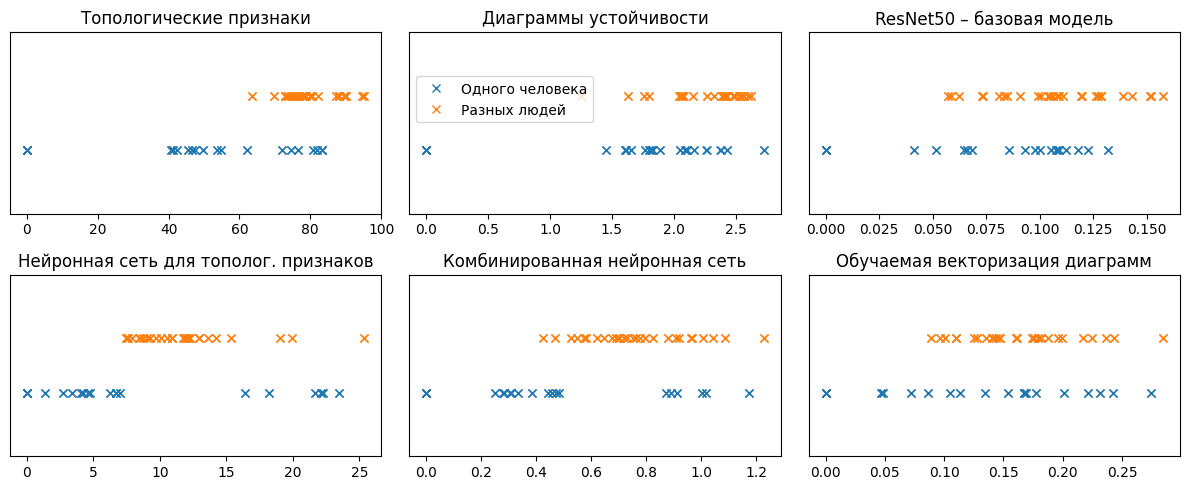

In [4]:
import cvtda.face_recognition
cvtda.face_recognition.learn(
    train_images, train_features, train_labels, train_diagrams,
    test_images, test_features, test_labels, test_diagrams,
    nn_length_before_new_iter = 5, nn_epochs = 3
)